In [6]:
import os
import numpy as np
import tensorflow as tf
import skimage as sk
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import pickle


import models

PATH = '../data/landmarks/'

IMAGE_SIZE = (100,100,3)

# Limite size of input for testing
TEST_LIMIT = 1000

SPLIT = 0.8
BATCH_SIZE = 64
EPOCHS = 20
STEPS_PER_EPOCH = 40

## Dataset pre-processing

In [9]:
with open(PATH + 'dict.pickle', 'rb') as handle:
    dictionary = pickle.load(handle)

#     dictionary={
#     'filenames': string array with the full path,
#     'classes': array (len,1),
#     'bboxes': array (len,4),
#     'landmarks': array (len,10)
#     }
    
h,w,c=IMAGE_SIZE
input_images = np.empty((len(dictionary['filenames']),h,w,c))
for i in tqdm_notebook(range(len(dictionary['filenames']))):
#for i in tqdm_notebook(range(10)):
    image = sk.io.imread(dictionary['filenames'][i])
    input_images[i] = sk.transform.resize(image,IMAGE_SIZE)

HBox(children=(IntProgress(value=0, max=1313), HTML(value='')))

c:\users\guillaume\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\guillaume\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [10]:
with open(PATH + 'dict.pickle', 'rb') as handle:
    dictionary = pickle.load(handle)

alpha_bbox=0.5
alpha_landmarks=0.5

input_beta = dictionary['classes']

output_classes = dictionary['classes']
output_bboxes = alpha_bbox * dictionary['bboxes']
# print(output_bboxes[250:260])
output_landmarks = alpha_bbox * dictionary['landmarks']
# print(output_landmarks[250:260])
# print(output_landmarks[250:260,0:10:2])
h,w,c = IMAGE_SIZE
# Normalize output_landmarks
output_landmarks[:,0:10:2] = output_landmarks[:,0:10:2]/h
output_landmarks[:,1:10:2] = output_landmarks[:,1:10:2]/w
# print(output_landmarks[250:260])

print("Number of positive: " + str(len(input_beta[input_beta==1])))
print("Number of negative: " + str(len(input_beta[input_beta==0])))

Number of positive: 658
Number of negative: 655


## Model definition

In [14]:
%load_ext autoreload
%autoreload 1
%aimport models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
w,h,c = IMAGE_SIZE
model = models.PNet(input_shape=IMAGE_SIZE)
print(model.summary())
losses = {
    'output_class': 'binary_crossentropy',
    'output_bbox': 'mse',
    'output_landmarks': 'mse'
}

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=losses,
              metrics=['accuracy']) 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 100, 100, 3)  0           input_image[0][0]                
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 100, 100, 16) 448         lambda_3[0][0]                   
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 50, 50, 16)   2320        conv2d_7[0][0]                   
__________________________________________________________________________________________________
max_poolin

## Training

In [12]:
callbacks = [
#     tf.keras.callbacks.ModelCheckpoint(
#         '../weights/landmarks/weights.{epoch:02d}-{val_loss:.2f}.hdf5',
#         save_best_only=True,
#         save_weights_only=True
#         ),
    tf.keras.callbacks.TensorBoard(log_dir='../output/logs')
    ]

model.fit(
    {'input_image':input_images, 'input_beta':input_beta},
    {'output_class':output_classes, 'output_bbox':output_bboxes, 'output_landmarks':output_landmarks},
    epochs=40,
    batch_size=BATCH_SIZE,
    validation_split=0.2
    #callbacks=callbacks
)

Train on 1050 samples, validate on 263 samples
Epoch 1/40
1050/1050 [==============================] - ETA: 7:26 - loss: 1.6234 - output_class_loss: 0.6963 - output_bbox_loss: 0.1890 - output_landmarks_loss: 0.7381 - output_class_acc: 0.5469 - output_bbox_acc: 0.6406 - output_landmarks_acc: 0.62 - ETA: 3:29 - loss: 1.5917 - output_class_loss: 0.7074 - output_bbox_loss: 0.2029 - output_landmarks_loss: 0.6814 - output_class_acc: 0.5312 - output_bbox_acc: 0.6406 - output_landmarks_acc: 0.63 - ETA: 2:10 - loss: 1.5964 - output_class_loss: 0.6893 - output_bbox_loss: 0.1894 - output_landmarks_loss: 0.7177 - output_class_acc: 0.6250 - output_bbox_acc: 0.6302 - output_landmarks_acc: 0.57 - ETA: 1:30 - loss: 1.6057 - output_class_loss: 0.6773 - output_bbox_loss: 0.1960 - output_landmarks_loss: 0.7324 - output_class_acc: 0.6680 - output_bbox_acc: 0.6094 - output_landmarks_acc: 0.55 - ETA: 1:07 - loss: 1.6145 - output_class_loss: 0.6720 - output_bbox_loss: 0.1965 - output_landmarks_loss: 0.7459 -

1050/1050 [==============================] - ETA: 1s - loss: 1.3622 - output_class_loss: 0.5778 - output_bbox_loss: 0.1683 - output_landmarks_loss: 0.6161 - output_class_acc: 0.9062 - output_bbox_acc: 0.7656 - output_landmarks_acc: 0.53 - ETA: 1s - loss: 1.3421 - output_class_loss: 0.5770 - output_bbox_loss: 0.1670 - output_landmarks_loss: 0.5981 - output_class_acc: 0.9141 - output_bbox_acc: 0.7266 - output_landmarks_acc: 0.56 - ETA: 1s - loss: 1.3211 - output_class_loss: 0.5744 - output_bbox_loss: 0.1574 - output_landmarks_loss: 0.5892 - output_class_acc: 0.9010 - output_bbox_acc: 0.7240 - output_landmarks_acc: 0.57 - ETA: 1s - loss: 1.3109 - output_class_loss: 0.5790 - output_bbox_loss: 0.1468 - output_landmarks_loss: 0.5850 - output_class_acc: 0.8789 - output_bbox_acc: 0.7148 - output_landmarks_acc: 0.58 - ETA: 1s - loss: 1.3169 - output_class_loss: 0.5781 - output_bbox_loss: 0.1422 - output_landmarks_loss: 0.5966 - output_class_acc: 0.8719 - output_bbox_acc: 0.6906 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 1.0709 - output_class_loss: 0.5396 - output_bbox_loss: 0.1065 - output_landmarks_loss: 0.4248 - output_class_acc: 0.9531 - output_bbox_acc: 0.8750 - output_landmarks_acc: 0.64 - ETA: 1s - loss: 1.0874 - output_class_loss: 0.5430 - output_bbox_loss: 0.1115 - output_landmarks_loss: 0.4328 - output_class_acc: 0.9141 - output_bbox_acc: 0.8438 - output_landmarks_acc: 0.66 - ETA: 1s - loss: 1.1396 - output_class_loss: 0.5458 - output_bbox_loss: 0.1108 - output_landmarks_loss: 0.4831 - output_class_acc: 0.9062 - output_bbox_acc: 0.8438 - output_landmarks_acc: 0.65 - ETA: 1s - loss: 1.1259 - output_class_loss: 0.5511 - output_bbox_loss: 0.1057 - output_landmarks_loss: 0.4692 - output_class_acc: 0.8867 - output_bbox_acc: 0.8320 - output_landmarks_acc: 0.64 - ETA: 1s - loss: 1.1437 - output_class_loss: 0.5508 - output_bbox_loss: 0.1073 - output_landmarks_loss: 0.4856 - output_class_acc: 0.8750 - output_bbox_acc: 0.8187 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 1.0235 - output_class_loss: 0.5145 - output_bbox_loss: 0.0875 - output_landmarks_loss: 0.4216 - output_class_acc: 0.8906 - output_bbox_acc: 0.7188 - output_landmarks_acc: 0.60 - ETA: 1s - loss: 1.1866 - output_class_loss: 0.5333 - output_bbox_loss: 0.1121 - output_landmarks_loss: 0.5412 - output_class_acc: 0.8594 - output_bbox_acc: 0.6953 - output_landmarks_acc: 0.55 - ETA: 1s - loss: 1.1211 - output_class_loss: 0.5386 - output_bbox_loss: 0.0933 - output_landmarks_loss: 0.4892 - output_class_acc: 0.8385 - output_bbox_acc: 0.7083 - output_landmarks_acc: 0.57 - ETA: 1s - loss: 1.0917 - output_class_loss: 0.5419 - output_bbox_loss: 0.0853 - output_landmarks_loss: 0.4645 - output_class_acc: 0.8320 - output_bbox_acc: 0.7305 - output_landmarks_acc: 0.59 - ETA: 1s - loss: 1.1072 - output_class_loss: 0.5405 - output_bbox_loss: 0.0976 - output_landmarks_loss: 0.4690 - output_class_acc: 0.8281 - output_bbox_acc: 0.7500 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.8396 - output_class_loss: 0.5049 - output_bbox_loss: 0.0507 - output_landmarks_loss: 0.2839 - output_class_acc: 0.8750 - output_bbox_acc: 0.8281 - output_landmarks_acc: 0.70 - ETA: 1s - loss: 0.9791 - output_class_loss: 0.5341 - output_bbox_loss: 0.0784 - output_landmarks_loss: 0.3666 - output_class_acc: 0.8203 - output_bbox_acc: 0.8125 - output_landmarks_acc: 0.63 - ETA: 1s - loss: 1.0779 - output_class_loss: 0.5360 - output_bbox_loss: 0.0968 - output_landmarks_loss: 0.4452 - output_class_acc: 0.8073 - output_bbox_acc: 0.7812 - output_landmarks_acc: 0.59 - ETA: 1s - loss: 1.0752 - output_class_loss: 0.5320 - output_bbox_loss: 0.0972 - output_landmarks_loss: 0.4461 - output_class_acc: 0.8047 - output_bbox_acc: 0.7695 - output_landmarks_acc: 0.58 - ETA: 1s - loss: 1.0434 - output_class_loss: 0.5303 - output_bbox_loss: 0.0914 - output_landmarks_loss: 0.4217 - output_class_acc: 0.8156 - output_bbox_acc: 0.7844 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.8735 - output_class_loss: 0.4934 - output_bbox_loss: 0.0836 - output_landmarks_loss: 0.2966 - output_class_acc: 0.8594 - output_bbox_acc: 0.7656 - output_landmarks_acc: 0.59 - ETA: 1s - loss: 0.9055 - output_class_loss: 0.4933 - output_bbox_loss: 0.0800 - output_landmarks_loss: 0.3323 - output_class_acc: 0.8672 - output_bbox_acc: 0.7812 - output_landmarks_acc: 0.56 - ETA: 1s - loss: 0.9537 - output_class_loss: 0.4955 - output_bbox_loss: 0.0870 - output_landmarks_loss: 0.3712 - output_class_acc: 0.8646 - output_bbox_acc: 0.7604 - output_landmarks_acc: 0.54 - ETA: 1s - loss: 0.9910 - output_class_loss: 0.4929 - output_bbox_loss: 0.0893 - output_landmarks_loss: 0.4088 - output_class_acc: 0.8594 - output_bbox_acc: 0.7734 - output_landmarks_acc: 0.55 - ETA: 1s - loss: 0.9808 - output_class_loss: 0.4977 - output_bbox_loss: 0.0874 - output_landmarks_loss: 0.3957 - output_class_acc: 0.8594 - output_bbox_acc: 0.7812 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.9483 - output_class_loss: 0.5086 - output_bbox_loss: 0.0647 - output_landmarks_loss: 0.3751 - output_class_acc: 0.9062 - output_bbox_acc: 0.7812 - output_landmarks_acc: 0.65 - ETA: 1s - loss: 0.9584 - output_class_loss: 0.4935 - output_bbox_loss: 0.0680 - output_landmarks_loss: 0.3970 - output_class_acc: 0.8984 - output_bbox_acc: 0.7656 - output_landmarks_acc: 0.62 - ETA: 1s - loss: 0.9171 - output_class_loss: 0.4847 - output_bbox_loss: 0.0689 - output_landmarks_loss: 0.3635 - output_class_acc: 0.9062 - output_bbox_acc: 0.7917 - output_landmarks_acc: 0.63 - ETA: 1s - loss: 0.9226 - output_class_loss: 0.4835 - output_bbox_loss: 0.0699 - output_landmarks_loss: 0.3692 - output_class_acc: 0.8945 - output_bbox_acc: 0.7891 - output_landmarks_acc: 0.62 - ETA: 1s - loss: 0.9471 - output_class_loss: 0.4816 - output_bbox_loss: 0.0739 - output_landmarks_loss: 0.3916 - output_class_acc: 0.8875 - output_bbox_acc: 0.7750 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.8039 - output_class_loss: 0.4511 - output_bbox_loss: 0.0454 - output_landmarks_loss: 0.3073 - output_class_acc: 0.9375 - output_bbox_acc: 0.7656 - output_landmarks_acc: 0.68 - ETA: 1s - loss: 0.8030 - output_class_loss: 0.4454 - output_bbox_loss: 0.0576 - output_landmarks_loss: 0.3000 - output_class_acc: 0.9375 - output_bbox_acc: 0.7656 - output_landmarks_acc: 0.67 - ETA: 1s - loss: 0.8682 - output_class_loss: 0.4700 - output_bbox_loss: 0.0719 - output_landmarks_loss: 0.3264 - output_class_acc: 0.9010 - output_bbox_acc: 0.7344 - output_landmarks_acc: 0.64 - ETA: 1s - loss: 0.8682 - output_class_loss: 0.4666 - output_bbox_loss: 0.0750 - output_landmarks_loss: 0.3266 - output_class_acc: 0.8945 - output_bbox_acc: 0.7539 - output_landmarks_acc: 0.62 - ETA: 1s - loss: 0.9073 - output_class_loss: 0.4700 - output_bbox_loss: 0.0771 - output_landmarks_loss: 0.3602 - output_class_acc: 0.8812 - output_bbox_acc: 0.7562 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.8621 - output_class_loss: 0.4236 - output_bbox_loss: 0.0866 - output_landmarks_loss: 0.3519 - output_class_acc: 0.9375 - output_bbox_acc: 0.7188 - output_landmarks_acc: 0.67 - ETA: 1s - loss: 0.8395 - output_class_loss: 0.4199 - output_bbox_loss: 0.0746 - output_landmarks_loss: 0.3450 - output_class_acc: 0.9453 - output_bbox_acc: 0.7422 - output_landmarks_acc: 0.66 - ETA: 1s - loss: 0.8358 - output_class_loss: 0.4290 - output_bbox_loss: 0.0599 - output_landmarks_loss: 0.3469 - output_class_acc: 0.9323 - output_bbox_acc: 0.7760 - output_landmarks_acc: 0.66 - ETA: 1s - loss: 0.8609 - output_class_loss: 0.4343 - output_bbox_loss: 0.0642 - output_landmarks_loss: 0.3624 - output_class_acc: 0.9258 - output_bbox_acc: 0.7734 - output_landmarks_acc: 0.63 - ETA: 1s - loss: 0.8634 - output_class_loss: 0.4358 - output_bbox_loss: 0.0658 - output_landmarks_loss: 0.3618 - output_class_acc: 0.9250 - output_bbox_acc: 0.7688 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.9560 - output_class_loss: 0.4385 - output_bbox_loss: 0.0707 - output_landmarks_loss: 0.4468 - output_class_acc: 0.9219 - output_bbox_acc: 0.7344 - output_landmarks_acc: 0.53 - ETA: 1s - loss: 0.8774 - output_class_loss: 0.4522 - output_bbox_loss: 0.0603 - output_landmarks_loss: 0.3648 - output_class_acc: 0.8828 - output_bbox_acc: 0.7891 - output_landmarks_acc: 0.64 - ETA: 1s - loss: 0.8423 - output_class_loss: 0.4511 - output_bbox_loss: 0.0574 - output_landmarks_loss: 0.3338 - output_class_acc: 0.8750 - output_bbox_acc: 0.8177 - output_landmarks_acc: 0.64 - ETA: 1s - loss: 0.8384 - output_class_loss: 0.4461 - output_bbox_loss: 0.0563 - output_landmarks_loss: 0.3359 - output_class_acc: 0.8711 - output_bbox_acc: 0.8242 - output_landmarks_acc: 0.65 - ETA: 1s - loss: 0.8660 - output_class_loss: 0.4371 - output_bbox_loss: 0.0643 - output_landmarks_loss: 0.3646 - output_class_acc: 0.8906 - output_bbox_acc: 0.7969 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.6129 - output_class_loss: 0.3850 - output_bbox_loss: 0.0290 - output_landmarks_loss: 0.1988 - output_class_acc: 0.8906 - output_bbox_acc: 0.8125 - output_landmarks_acc: 0.65 - ETA: 1s - loss: 0.7300 - output_class_loss: 0.4042 - output_bbox_loss: 0.0432 - output_landmarks_loss: 0.2826 - output_class_acc: 0.8750 - output_bbox_acc: 0.8125 - output_landmarks_acc: 0.63 - ETA: 1s - loss: 0.7657 - output_class_loss: 0.3957 - output_bbox_loss: 0.0592 - output_landmarks_loss: 0.3109 - output_class_acc: 0.8854 - output_bbox_acc: 0.8177 - output_landmarks_acc: 0.60 - ETA: 1s - loss: 0.7342 - output_class_loss: 0.3965 - output_bbox_loss: 0.0571 - output_landmarks_loss: 0.2806 - output_class_acc: 0.8867 - output_bbox_acc: 0.8281 - output_landmarks_acc: 0.62 - ETA: 1s - loss: 0.6998 - output_class_loss: 0.3936 - output_bbox_loss: 0.0504 - output_landmarks_loss: 0.2557 - output_class_acc: 0.8906 - output_bbox_acc: 0.8344 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.8287 - output_class_loss: 0.4062 - output_bbox_loss: 0.0561 - output_landmarks_loss: 0.3664 - output_class_acc: 0.9062 - output_bbox_acc: 0.7656 - output_landmarks_acc: 0.67 - ETA: 1s - loss: 0.7184 - output_class_loss: 0.3987 - output_bbox_loss: 0.0427 - output_landmarks_loss: 0.2770 - output_class_acc: 0.9297 - output_bbox_acc: 0.7969 - output_landmarks_acc: 0.67 - ETA: 1s - loss: 0.6994 - output_class_loss: 0.3835 - output_bbox_loss: 0.0398 - output_landmarks_loss: 0.2761 - output_class_acc: 0.9375 - output_bbox_acc: 0.8177 - output_landmarks_acc: 0.67 - ETA: 1s - loss: 0.6929 - output_class_loss: 0.3833 - output_bbox_loss: 0.0449 - output_landmarks_loss: 0.2647 - output_class_acc: 0.9375 - output_bbox_acc: 0.8047 - output_landmarks_acc: 0.67 - ETA: 1s - loss: 0.7035 - output_class_loss: 0.3843 - output_bbox_loss: 0.0507 - output_landmarks_loss: 0.2685 - output_class_acc: 0.9250 - output_bbox_acc: 0.8125 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.7979 - output_class_loss: 0.3925 - output_bbox_loss: 0.0687 - output_landmarks_loss: 0.3366 - output_class_acc: 0.9062 - output_bbox_acc: 0.8438 - output_landmarks_acc: 0.53 - ETA: 1s - loss: 0.7481 - output_class_loss: 0.3791 - output_bbox_loss: 0.0870 - output_landmarks_loss: 0.2819 - output_class_acc: 0.9141 - output_bbox_acc: 0.8516 - output_landmarks_acc: 0.62 - ETA: 1s - loss: 0.7272 - output_class_loss: 0.3682 - output_bbox_loss: 0.0774 - output_landmarks_loss: 0.2817 - output_class_acc: 0.9271 - output_bbox_acc: 0.8281 - output_landmarks_acc: 0.60 - ETA: 1s - loss: 0.7047 - output_class_loss: 0.3692 - output_bbox_loss: 0.0670 - output_landmarks_loss: 0.2685 - output_class_acc: 0.9180 - output_bbox_acc: 0.8320 - output_landmarks_acc: 0.62 - ETA: 1s - loss: 0.6857 - output_class_loss: 0.3702 - output_bbox_loss: 0.0608 - output_landmarks_loss: 0.2547 - output_class_acc: 0.9187 - output_bbox_acc: 0.8469 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.5456 - output_class_loss: 0.3370 - output_bbox_loss: 0.0374 - output_landmarks_loss: 0.1712 - output_class_acc: 0.9531 - output_bbox_acc: 0.8281 - output_landmarks_acc: 0.70 - ETA: 1s - loss: 0.5540 - output_class_loss: 0.3492 - output_bbox_loss: 0.0263 - output_landmarks_loss: 0.1786 - output_class_acc: 0.9531 - output_bbox_acc: 0.8281 - output_landmarks_acc: 0.71 - ETA: 1s - loss: 0.6017 - output_class_loss: 0.3517 - output_bbox_loss: 0.0408 - output_landmarks_loss: 0.2092 - output_class_acc: 0.9323 - output_bbox_acc: 0.8125 - output_landmarks_acc: 0.67 - ETA: 1s - loss: 0.5988 - output_class_loss: 0.3523 - output_bbox_loss: 0.0429 - output_landmarks_loss: 0.2036 - output_class_acc: 0.9258 - output_bbox_acc: 0.8242 - output_landmarks_acc: 0.68 - ETA: 1s - loss: 0.5916 - output_class_loss: 0.3491 - output_bbox_loss: 0.0401 - output_landmarks_loss: 0.2024 - output_class_acc: 0.9250 - output_bbox_acc: 0.8375 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.5975 - output_class_loss: 0.3212 - output_bbox_loss: 0.0284 - output_landmarks_loss: 0.2478 - output_class_acc: 0.8906 - output_bbox_acc: 0.7969 - output_landmarks_acc: 0.70 - ETA: 1s - loss: 0.5775 - output_class_loss: 0.3181 - output_bbox_loss: 0.0404 - output_landmarks_loss: 0.2189 - output_class_acc: 0.9141 - output_bbox_acc: 0.8359 - output_landmarks_acc: 0.68 - ETA: 1s - loss: 0.5876 - output_class_loss: 0.3303 - output_bbox_loss: 0.0383 - output_landmarks_loss: 0.2190 - output_class_acc: 0.9062 - output_bbox_acc: 0.8542 - output_landmarks_acc: 0.68 - ETA: 1s - loss: 0.5605 - output_class_loss: 0.3295 - output_bbox_loss: 0.0326 - output_landmarks_loss: 0.1984 - output_class_acc: 0.9102 - output_bbox_acc: 0.8477 - output_landmarks_acc: 0.69 - ETA: 1s - loss: 0.5881 - output_class_loss: 0.3389 - output_bbox_loss: 0.0341 - output_landmarks_loss: 0.2151 - output_class_acc: 0.9031 - output_bbox_acc: 0.8344 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.6307 - output_class_loss: 0.3525 - output_bbox_loss: 0.0776 - output_landmarks_loss: 0.2006 - output_class_acc: 0.9062 - output_bbox_acc: 0.9219 - output_landmarks_acc: 0.68 - ETA: 1s - loss: 0.5734 - output_class_loss: 0.3191 - output_bbox_loss: 0.0509 - output_landmarks_loss: 0.2034 - output_class_acc: 0.9297 - output_bbox_acc: 0.8906 - output_landmarks_acc: 0.67 - ETA: 1s - loss: 0.5777 - output_class_loss: 0.3074 - output_bbox_loss: 0.0576 - output_landmarks_loss: 0.2127 - output_class_acc: 0.9427 - output_bbox_acc: 0.8542 - output_landmarks_acc: 0.65 - ETA: 1s - loss: 0.5556 - output_class_loss: 0.3017 - output_bbox_loss: 0.0494 - output_landmarks_loss: 0.2044 - output_class_acc: 0.9570 - output_bbox_acc: 0.8555 - output_landmarks_acc: 0.65 - ETA: 1s - loss: 0.5831 - output_class_loss: 0.3169 - output_bbox_loss: 0.0490 - output_landmarks_loss: 0.2172 - output_class_acc: 0.9437 - output_bbox_acc: 0.8438 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.5360 - output_class_loss: 0.3725 - output_bbox_loss: 0.0154 - output_landmarks_loss: 0.1482 - output_class_acc: 0.8750 - output_bbox_acc: 0.8594 - output_landmarks_acc: 0.75 - ETA: 1s - loss: 0.5052 - output_class_loss: 0.3243 - output_bbox_loss: 0.0195 - output_landmarks_loss: 0.1614 - output_class_acc: 0.9062 - output_bbox_acc: 0.8594 - output_landmarks_acc: 0.71 - ETA: 1s - loss: 0.5036 - output_class_loss: 0.3073 - output_bbox_loss: 0.0241 - output_landmarks_loss: 0.1722 - output_class_acc: 0.9219 - output_bbox_acc: 0.8333 - output_landmarks_acc: 0.70 - ETA: 1s - loss: 0.5189 - output_class_loss: 0.3054 - output_bbox_loss: 0.0336 - output_landmarks_loss: 0.1800 - output_class_acc: 0.9258 - output_bbox_acc: 0.8398 - output_landmarks_acc: 0.69 - ETA: 1s - loss: 0.5076 - output_class_loss: 0.3074 - output_bbox_loss: 0.0326 - output_landmarks_loss: 0.1676 - output_class_acc: 0.9219 - output_bbox_acc: 0.8469 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.5955 - output_class_loss: 0.2729 - output_bbox_loss: 0.0784 - output_landmarks_loss: 0.2442 - output_class_acc: 0.9688 - output_bbox_acc: 0.8750 - output_landmarks_acc: 0.59 - ETA: 1s - loss: 0.5399 - output_class_loss: 0.3032 - output_bbox_loss: 0.0549 - output_landmarks_loss: 0.1817 - output_class_acc: 0.9375 - output_bbox_acc: 0.8672 - output_landmarks_acc: 0.61 - ETA: 1s - loss: 0.5553 - output_class_loss: 0.2981 - output_bbox_loss: 0.0566 - output_landmarks_loss: 0.2006 - output_class_acc: 0.9427 - output_bbox_acc: 0.8542 - output_landmarks_acc: 0.63 - ETA: 1s - loss: 0.5267 - output_class_loss: 0.2837 - output_bbox_loss: 0.0475 - output_landmarks_loss: 0.1955 - output_class_acc: 0.9570 - output_bbox_acc: 0.8516 - output_landmarks_acc: 0.65 - ETA: 1s - loss: 0.5254 - output_class_loss: 0.2853 - output_bbox_loss: 0.0432 - output_landmarks_loss: 0.1969 - output_class_acc: 0.9500 - output_bbox_acc: 0.8344 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.5961 - output_class_loss: 0.2806 - output_bbox_loss: 0.0562 - output_landmarks_loss: 0.2593 - output_class_acc: 0.9688 - output_bbox_acc: 0.8125 - output_landmarks_acc: 0.57 - ETA: 1s - loss: 0.6833 - output_class_loss: 0.3217 - output_bbox_loss: 0.0631 - output_landmarks_loss: 0.2985 - output_class_acc: 0.9531 - output_bbox_acc: 0.7891 - output_landmarks_acc: 0.55 - ETA: 1s - loss: 0.6601 - output_class_loss: 0.3112 - output_bbox_loss: 0.0607 - output_landmarks_loss: 0.2882 - output_class_acc: 0.9479 - output_bbox_acc: 0.7552 - output_landmarks_acc: 0.58 - ETA: 1s - loss: 0.5956 - output_class_loss: 0.2937 - output_bbox_loss: 0.0514 - output_landmarks_loss: 0.2505 - output_class_acc: 0.9492 - output_bbox_acc: 0.7812 - output_landmarks_acc: 0.63 - ETA: 1s - loss: 0.5619 - output_class_loss: 0.2846 - output_bbox_loss: 0.0486 - output_landmarks_loss: 0.2287 - output_class_acc: 0.9500 - output_bbox_acc: 0.7875 - output_landmar

1050/1050 [==============================] - ETA: 1s - loss: 0.4851 - output_class_loss: 0.2645 - output_bbox_loss: 0.0269 - output_landmarks_loss: 0.1938 - output_class_acc: 0.9219 - output_bbox_acc: 0.8125 - output_landmarks_acc: 0.70 - ETA: 1s - loss: 0.4949 - output_class_loss: 0.2815 - output_bbox_loss: 0.0306 - output_landmarks_loss: 0.1827 - output_class_acc: 0.9219 - output_bbox_acc: 0.8047 - output_landmarks_acc: 0.67 - ETA: 1s - loss: 0.5279 - output_class_loss: 0.2856 - output_bbox_loss: 0.0407 - output_landmarks_loss: 0.2016 - output_class_acc: 0.9271 - output_bbox_acc: 0.8021 - output_landmarks_acc: 0.65 - ETA: 1s - loss: 0.5211 - output_class_loss: 0.2721 - output_bbox_loss: 0.0431 - output_landmarks_loss: 0.2060 - output_class_acc: 0.9375 - output_bbox_acc: 0.7930 - output_landmarks_acc: 0.65 - ETA: 1s - loss: 0.5044 - output_class_loss: 0.2711 - output_bbox_loss: 0.0415 - output_landmarks_loss: 0.1917 - output_class_acc: 0.9406 - output_bbox_acc: 0.7969 - output_landmar

## Prediction

c:\users\guillaume\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\guillaume\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


[array([[0.44895312]], dtype=float32), array([[ 0.13412388,  0.00068881, -0.14448899, -0.31321314]],
      dtype=float32), array([[-0.7636966 , -0.45185506, -0.4698626 , -0.6495259 , -0.6419506 ,
        -0.6088552 , -0.61393493, -0.48751783, -0.32478264, -0.7046972 ]],
      dtype=float32)]


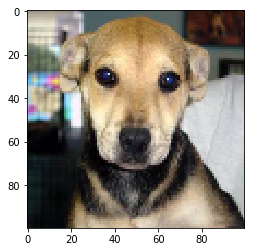

In [16]:
test_image = sk.io.imread(PATH + 'evaluate/' + 'dog.4.jpg')
test_image = sk.transform.resize(test_image, IMAGE_SIZE)
plt.imshow(test_image)
test_beta = 1.0
input_dict = {'input_image':np.array([test_image]),'input_beta':np.array([test_beta])}
prediction = model.predict(input_dict)
print(prediction)

c:\users\guillaume\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\guillaume\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


[array([[0.31123963]], dtype=float32), array([[ 0., -0., -0., -0.]], dtype=float32), array([[-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.]], dtype=float32)]


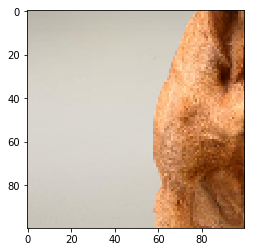

In [15]:
test_image = sk.io.imread(PATH + 'resized/' + '0_neg_1.jpg')
test_image = sk.transform.resize(test_image, IMAGE_SIZE)
plt.imshow(test_image)
test_beta = 0.0
input_dict = {'input_image':np.array([test_image]),'input_beta':np.array([test_beta])}
prediction = model.predict(input_dict)
print(prediction)

In [14]:
# General accuracy
input_dict = {'input_image':input_images,'input_beta':input_beta}
prediction = model.predict(input_dict)
classes = prediction[0]
accuracy = 0
for i in range(len(classes)):
    if (classes[i] < 0.5 and input_beta[i]==0) or (classes[i] > 0.5 and input_beta[i]==1):
        accuracy += 1
print(accuracy/len(classes))

0.7905559786747905


In [13]:
other_data = 'D:/PROGRAMMATION/Dataset/dogscats/dogscats/valid/dogs/'
fnames = os.listdir(other_data)
test_inputs = np.zeros((100,100,100,3))
for i in range(100):
    test_image = sk.io.imread(other_data + fnames[i])
    test_image = sk.transform.resize(test_image, (100,100,3))
    test_inputs[i] = test_image

input_dict = {'input_image':test_inputs,'input_beta':np.ones(100)}
prediction = model.predict(input_dict)
classes = prediction[0]
accuracy = 0
for i in range(len(classes)):
    if (classes[i] < 0.5 and input_beta[i]==0) or (classes[i] > 0.5 and input_beta[i]==1):
        accuracy += 1
print(accuracy/len(classes))

c:\users\guillaume\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\guillaume\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


0.42
